### PROGRAMMING ASSIGNMENT
---

Data: https://archive.ics.uci.edu/dataset/368/facebook+metrics

This dataset contains data extracted from a Facebook page, focusing on various metrics associated with each post. The dataset includes details such as the type of content, whether the post was paid or not, engagement metrics like likes, shares, and comments, as well as reach and impression statistics.

Perform regression analysis on the chosen dataset.

### Step 1: Load and Inspect the Data

We start by loading the dataset using `pandas`. The dataset contains weekly sales data for various products, with each row representing a product and the columns representing sales data for different weeks. We display the first few rows to get an initial understanding of the data.


In [4]:
import pandas as pd

# Load the dataset from the specified file
df = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(df.head())

First few rows of the dataset:


,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


### Step 2: Prepare the Data

In this step, we prepare the data for regression analysis. We select the weekly sales columns (`W0` to `W50`) as the features (independent variables) and the sales data for week 51 (`W51`) as the target variable (dependent variable). We then split the dataset into training and testing sets using an 80-20 split.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select the features (independent variables) and target variable (dependent variable)
features = df.columns[1:52]  # W0 to W50
target = 'W51'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 19.241143328005307
R-squared: 0.7645966431877372


### Step 3: Train the Model

Next, we initialize a `LinearRegression` model from `scikit-learn` and train it using the training data. This step involves fitting the model to the data so that it can learn the relationship between the features and the target variable.


In [5]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

### Step 4: Evaluate the Model

Finally, we use the trained model to make predictions on the test set. We evaluate the model's performance using the Mean Squared Error (MSE) and R-squared (R²) metrics. The MSE measures the average squared difference between the predicted and actual values, while the R-squared indicates the proportion of the variance in the target variable that is predictable from the independent variables.


In [6]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict the target variable for the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 19.241143328005307
R-squared: 0.7645966431877372


### Step 5: Sample Predictions
We select three weeks' worth of predictions to compare with the actual values and create graphs to visualize the predictions versus the actual values for three selected products.

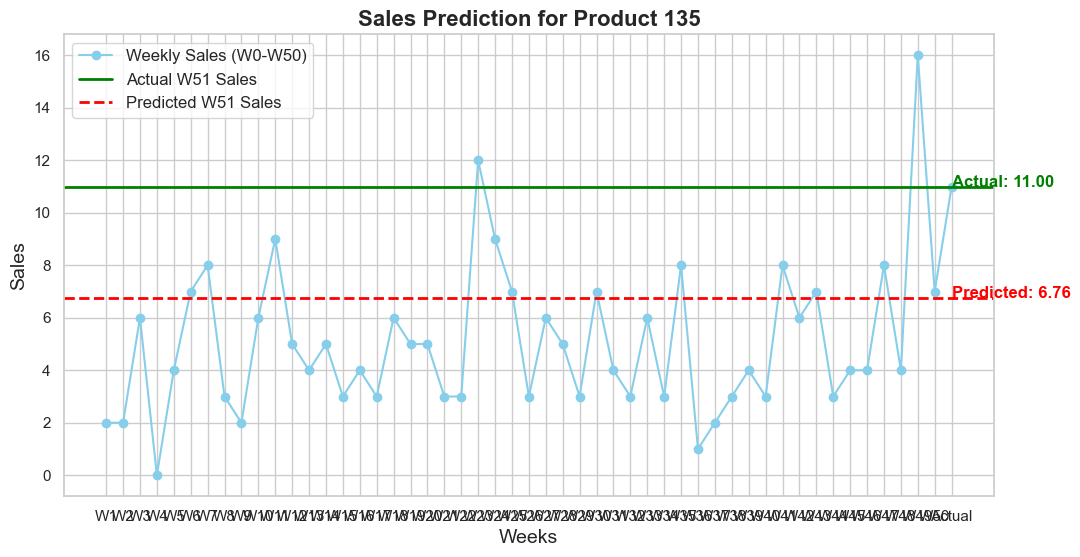

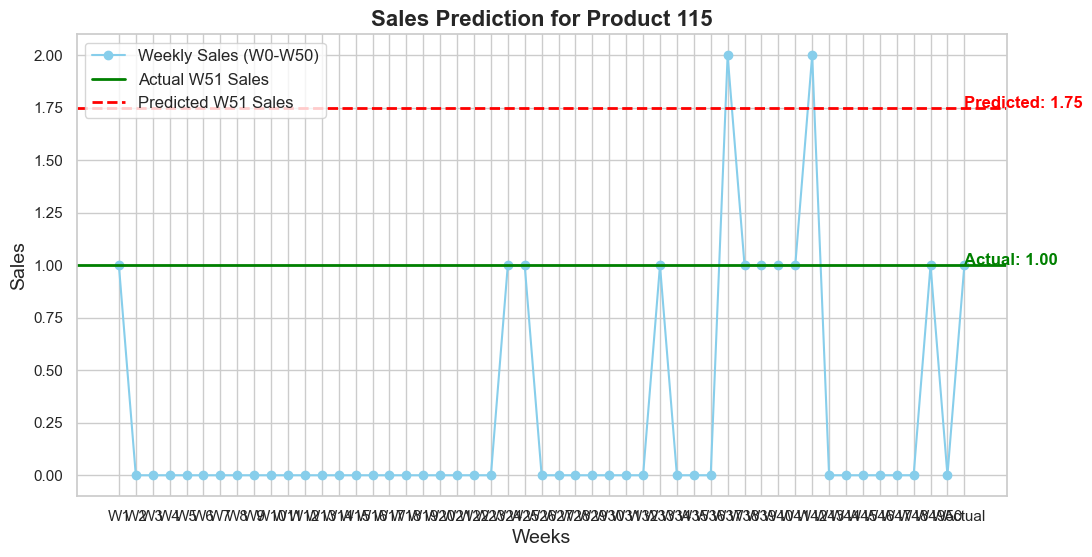

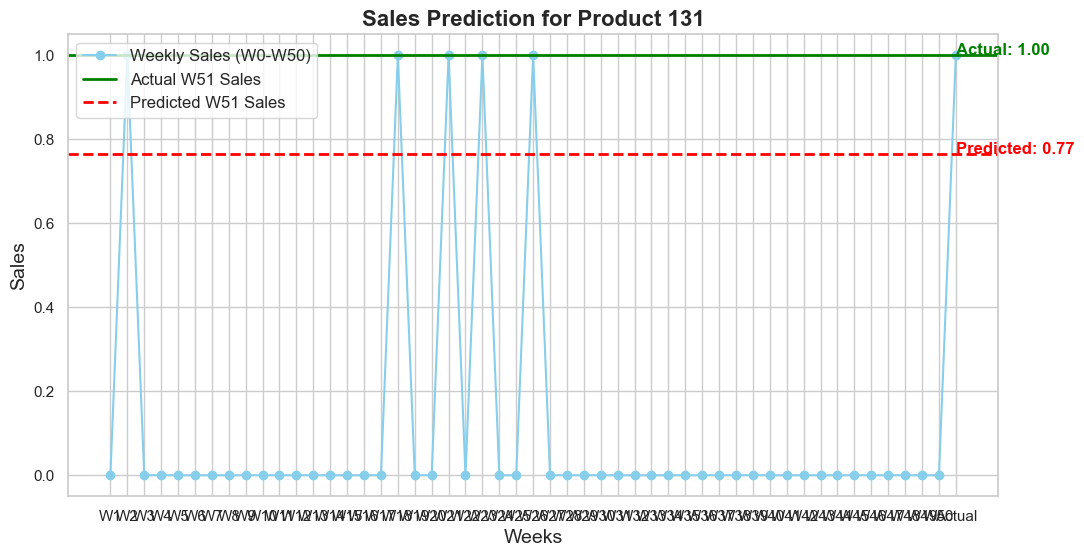

In [9]:
import seaborn as sns

sns.set(style="whitegrid")

# Plot the results for the three selected samples
for i, idx in enumerate(sample_indices):
    plt.figure(figsize=(12, 6))
    
    # Plot weekly sales
    plt.plot(sample_results.columns[1:52], sample_results.loc[idx, sample_results.columns[1:52]], 
             label='Weekly Sales (W0-W50)', marker='o', color='skyblue')
    
    # Highlight actual W51 sales
    plt.axhline(y=sample_results.loc[idx, "Actual"], color='green', linestyle='-', linewidth=2, 
                label='Actual W51 Sales')
    
    # Highlight predicted W51 sales
    plt.axhline(y=sample_results.loc[idx, "Predicted"], color='red', linestyle='--', linewidth=2, 
                label='Predicted W51 Sales')
    
    # Annotate the actual and predicted values
    plt.text(50, sample_results.loc[idx, "Actual"], f'Actual: {sample_results.loc[idx, "Actual"]:.2f}', 
             horizontalalignment='left', color='green', weight='bold')
    plt.text(50, sample_results.loc[idx, "Predicted"], f'Predicted: {sample_results.loc[idx, "Predicted"]:.2f}', 
             horizontalalignment='left', color='red', weight='bold')
    
    # Set plot labels and title
    plt.xlabel('Weeks', fontsize=14)
    plt.ylabel('Sales', fontsize=14)
    plt.title(f'Sales Prediction for Product {idx}', fontsize=16, weight='bold')
    
    # Add legend
    plt.legend(loc='upper left', fontsize=12)
    
    # Show grid
    plt.grid(True)
    
    # Show the plot
    plt.show()
